# Mental Health Risk Prediction System

U2,500,000 Sample

In [1]:
#Import Necessary Libraries/Packages
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

### Step 1: Data Exploration and Preprocessing

In [3]:
data= pd.read_csv('sample2.csv')

In [4]:
#Create Target Column (1:High Risk, 0:Low Risk)
def label_risk(row):
    if row['SMISED'] == 1:
        return 1
    if row['SMISED'] == 2:
        return 1
    if row['SMISED'] == 3:
        return 0
    else:
        return float('NaN')

data['mh_risk'] = data.apply(label_risk, axis=1)
data = data.dropna()
data = data.astype('int64')

In [5]:
df = data.drop(columns=['CASEID', 'CMPSERVICE', 'IJSSERVICE', 
                        'OPISERVICE','TRAUSTREFLG', 'ANXIETYFLG', 
                        'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 
                        'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 
                        'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 
                        'ALCSUBFLG', 'OTHERDISFLG',
                        'RTCSERVICE', 'SPHSERVICE', 'YEAR', 'SMISED', 'DIVISION', 'REGION'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343299 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column    Dtype
---  ------    -----
 0   AGE       int64
 1   EDUC      int64
 2   ETHNIC    int64
 3   RACE      int64
 4   GENDER    int64
 5   MH1       int64
 6   MH2       int64
 7   MH3       int64
 8   SUB       int64
 9   MARSTAT   int64
 10  SAP       int64
 11  EMPLOY    int64
 12  DETNLF    int64
 13  VETERAN   int64
 14  LIVARAG   int64
 15  NUMMHS    int64
 16  STATEFIP  int64
 17  mh_risk   int64
dtypes: int64(18)
memory usage: 339.7 MB


In [7]:
#df.head()

### Step 2: Descriptive Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mh_risk', ylabel='Count'>

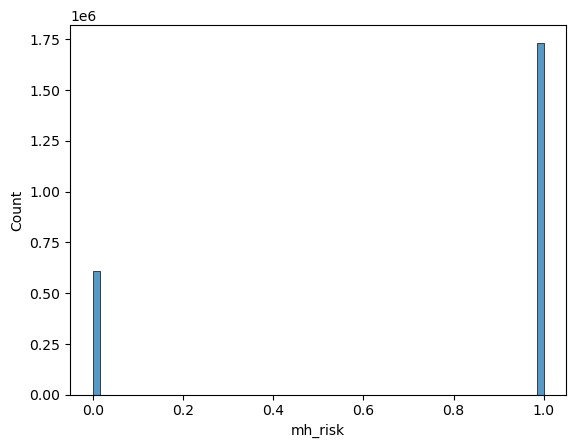

In [9]:
import seaborn as sns
sns.histplot(data=df, x='mh_risk')

<Axes: >

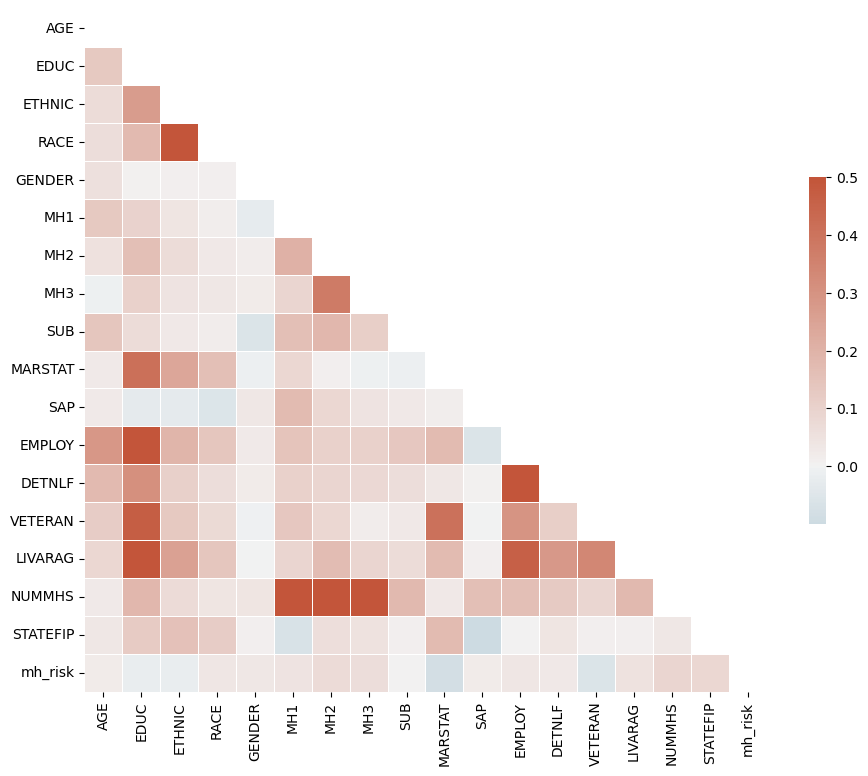

In [10]:
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Step 3: Factor Analysis

In [12]:
# Import required libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [13]:
#Barlett's Test checks whether observed variables are intercorrelated

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(12641131.926425146, 0.0)

In [14]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

kmo_model

0.556927208246264

Conclusion: Data not suitable for factor analysis.

### Step 4: Feature Selection

In [17]:
#Features
X = df.drop(columns=['mh_risk'])
X.head()

,AGE,EDUC,ETHNIC,RACE,GENDER,MH1,MH2,MH3,SUB,MARSTAT,SAP,EMPLOY,DETNLF,VETERAN,LIVARAG,NUMMHS,STATEFIP
0,8,-9,3,-9,1,-9,-9,-9,-9,-9,2,-9,-9,-9,-9,0,6
1,7,5,4,5,2,11,-9,-9,-9,1,2,4,-9,2,2,1,24
2,14,5,4,5,2,10,13,-9,8,4,1,5,1,2,2,2,18
3,3,4,4,5,1,7,-9,-9,-9,-9,-9,4,-9,-9,2,1,20
4,11,5,4,5,2,6,13,-9,-9,4,2,-9,-9,2,2,2,34


In [25]:
from scipy import stats

#Perform a t-test for each feature and calculate p-values
p_values=[]
for feature in X.columns:
    t_stat, p_value = stats.ttest_ind(X[feature][y==0], X[feature][y==1])
    p_values.append(p_value)

#Set the significance lever
alpha=0.05

#Select features with p-values below the significance level
selected_features = [X.columns[i] for i, p in enumerate(p_values) if p<alpha]

In [26]:
selected_features

['AGE',
 'EDUC',
 'ETHNIC',
 'RACE',
 'GENDER',
 'MH1',
 'MH2',
 'MH3',
 'SUB',
 'MARSTAT',
 'SAP',
 'EMPLOY',
 'DETNLF',
 'VETERAN',
 'LIVARAG',
 'NUMMHS',
 'STATEFIP']

In [28]:
features = list(X.columns)
#features

In [24]:
##Feature importance
feature_importance = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 5 Most Importance Features:")
print(feature_importance.head())


Top 5 Most Importance Features:
     feature  importance
16  STATEFIP    0.285430
5        MH1    0.184478
0        AGE    0.114587
1       EDUC    0.055748
9    MARSTAT    0.040253


In [18]:
#Target
y = df['mh_risk'].values

In [19]:
##Split dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Step 5: Model Development

In [20]:
# RF
model = RandomForestClassifier()      
model.fit(X_train,y_train)
y_pred=pd.DataFrame(model.predict_proba(X_test))[1].values
roc_auc_score(y_test,y_pred)

0.9302695074727267

In [21]:
#Cross Validation
from sklearn.model_selection import cross_val_predict

y_pred_rf = cross_val_predict(model, X_test, y_test, cv=5) 

### Step 6: Model Evaluation

In [22]:
#RF Metrics
print("F1 score:", f1_score(y_test, y_pred_rf, average='binary'))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))

F1 score: 0.9128448432324515
ROC AUC: 0.8139612827996898
Accuracy: 0.8688473520249221
Precision: 0.8978002024918208
Recall: 0.9284022900653275
Confusion Matrix: [[ 85303  36642]
 [ 24824 321891]]


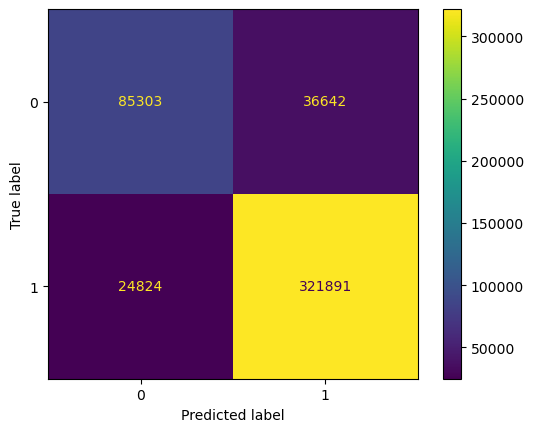

In [23]:
cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

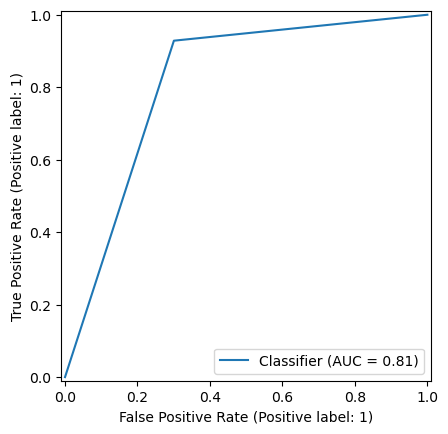

In [24]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

In [25]:
predicted_probs = pd.DataFrame(y_pred)
predicted_probs.describe()

,0
count,468660.000000
mean,0.738943
std,0.345076
min,0.000000
25%,0.529662
50%,0.940985
75%,1.000000
max,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


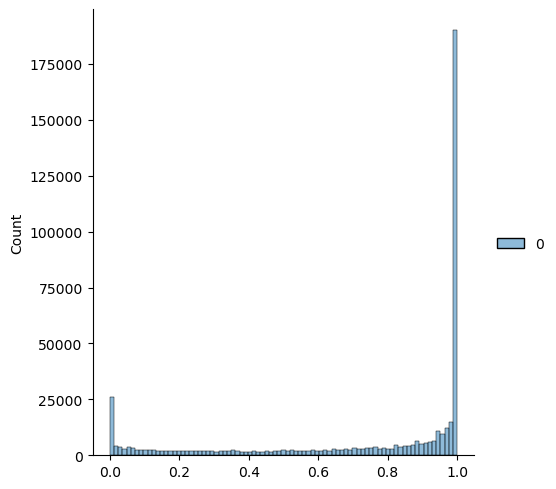

In [26]:
sns.displot(predicted_probs)

In [30]:
#Create user class
class patient:
    def __init__(self, patientid):
        self.id = patientid
        self.demographic_info = {}
        self.clinical_info = {}

In [32]:
#Create system class
class mhRiskPrediction:
    def __init__(self):
        self.model = model
        self.patients = []
    def add_patient(self, patient):
        self.patients.append(patient)
    def assess_patient(self, patient):
        #Prep for prediction
        patient_data = np.zeros(len(features))
        for i, feature in enumerate(features):
            if feature in patient.demographic_info:
                patient_data[i] = patient.demographic_info[feature]
            elif feature in patient.clinical_info:
                patient_data[i] = patient.clinical_info[feature]
            elif feature == 'patientid':
                patient_data[i] = patient.id
        #Make prediction
        prediction = self.model.predict([patient_data])[0]
        probability = self.model.predict_proba([patient_data])[0][1]
        
        return prediction, probability

    def get_result(self, patient, prediction, probability):
        report = f"Mental Health Risk Assessment for Patient: {patient.id}:\nRisk Status: {'High Risk' if prediction == 1 else 'Low Risk'}\nRisk Score: {probability: .2f}\n"
        report += "\nDemographic Info:\n"
        for key, value in patient.demographic_info.items():
            report += f"{key}: {value}\n"
        report += "\nClinical Info:\n"
        for key, value in patient.clinical_info.items():
            report += f"{key}: {value}\n"
        return report

In [36]:
#features

In [35]:
#Example
system = mhRiskPrediction()

#Add patient
patient1 = patient('000000001')
patient1.demographic_info = {'AGE':14, 'EDUC':5, 'ETHNIC':3, 'GENDER':1,'MARISTAT':4, 'EMPLOY':5, 
                             'DETNLF':1, 'VETERAN':2, 'LIVARAG':2, 'STATEFIP':18}
patient1.clinical_info = {'MH1':10, 'MH2':13, 'MH3':11, 'SUB':8, 'SAP':1, 'NUMMHS':3}
system.add_patient(patient1)

#Assess patient data
prediction, probability = system.assess_patient(patient1)

#View Result
result=system.get_result(patient1, prediction, probability)
print(result)

Mental Health Risk Assessment for Patient: 000000001:
Risk Status: High Risk
Risk Score:  0.80

Demographic Info:
AGE: 14
EDUC: 5
ETHNIC: 3
GENDER: 1
MARISTAT: 4
EMPLOY: 5
DETNLF: 1
VETERAN: 2
LIVARAG: 2
STATEFIP: 18

Clinical Info:
MH1: 10
MH2: 13
MH3: 11
SUB: 8
SAP: 1
NUMMHS: 3



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
